## Imports

In [1]:
# main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown

In [2]:
!pip install geoplot
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz
!pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 17.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64

In [3]:
# geo libraries

import geopandas as gpd
import geoplot as gplt
import plotly.graph_objects as go
import networkx as nx
import pygraphviz
from pyvis.network import Network

# Week 1

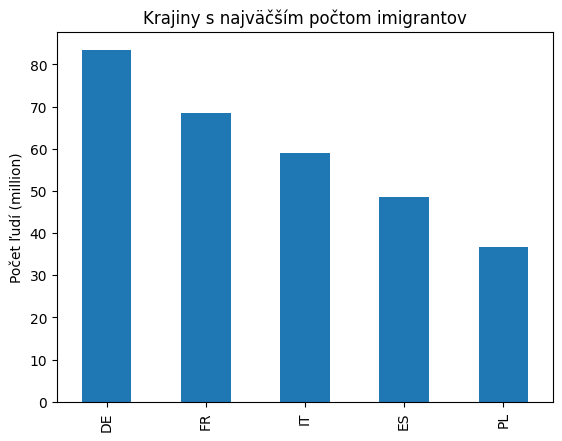

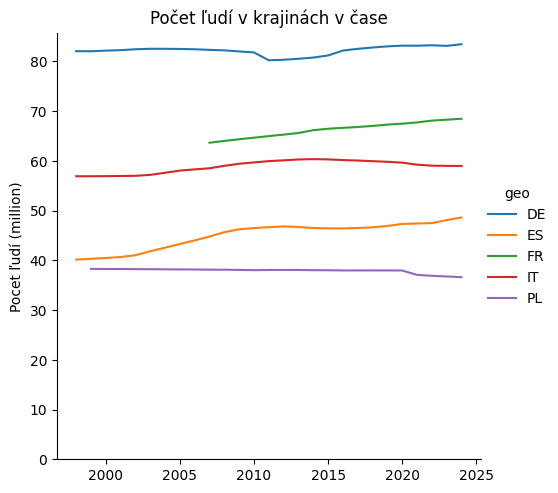

In [4]:
url = "https://raw.githubusercontent.com/loveBeatles/datavis_project/main/data/GeneralEU1.csv"

# Чтение CSV файла, убираем лишние столбцы
df = pd.read_csv(url).drop(['STRUCTURE','STRUCTURE_ID', 'CONF_STATUS', 'OBS_FLAG', 'freq'], axis=1)
# ДатаФрейм без разделения полов
df_without_genders = df.groupby(['geo', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()
df_without_genders['OBS_VALUE_milion'] = df_without_genders['OBS_VALUE'] /1000000
# ДатаФрейм отсортированный по кол-ву людей по убыванию
df_sorted_by_number_immigrates = df_without_genders[df_without_genders['TIME_PERIOD'] == 2024].sort_values(by="OBS_VALUE", ascending=False)
# Список, который содержит 5 стран с наибольшим кол-вом людей
countries_highest_number_immigrates = list(df_sorted_by_number_immigrates['geo'][:5])
# График людей 5 стран с наибольшим кол-вом людей за 2024 год
plot_for_number_immigrates = df_sorted_by_number_immigrates[:5].plot(x='geo',
                                                                     y='OBS_VALUE_milion',
                                                                     kind='bar',
                                                                     ylabel='Počet ľudí (million)',
                                                                     xlabel='',
                                                                     title='Krajiny s najväčším počtom imigrantov',
                                                                     legend=False)

# График как менялось кол-во людей для 5 стран с наибольшим кол-вом людей за 2024 год
plot_for_number_immigrates_trough_time = sns.relplot(data=df_without_genders[df_without_genders['geo'].isin(countries_highest_number_immigrates)],
                                                     x='TIME_PERIOD', y='OBS_VALUE_milion',
                                                     hue='geo', kind="line")
plot_for_number_immigrates_trough_time.set_axis_labels('', 'Pocet ľudí (million)')
plot_for_number_immigrates_trough_time.set(title='Počet ľudí v krajinách v čase')
# Настройка, чтоб отсчет в графике был от нуля
plt.ylim(0, )

plt.show()

In [25]:
url1 = "https://raw.githubusercontent.com/loveBeatles/datavis_project/main/data/points_of_country.csv"
data_frame_by_points_of_country = pd.read_csv(url1).drop(['ISO-ALPHA-3','IOC', 'FIFA'], axis=1)
data = {
    "geo": list(df['geo'].unique())
}
data_frame_by_points_of_country = data_frame_by_points_of_country.iloc[:, :4]

nove = pd.DataFrame(data)
points = pd.merge(nove, data_frame_by_points_of_country, left_on='geo', right_on='ISO-ALPHA-2')
points = points.query('Country != "East Germany" and Country != "German Democratic Republic" and Country != "West Germany"')
points = points.drop_duplicates(subset=['ISO-ALPHA-2'], keep='first')
points = points.drop('ISO-ALPHA-2',axis=1)
nove_frame = pd.merge(points, df_sorted_by_number_immigrates, on="geo")



fig = px.scatter_geo(
    nove_frame,
    lat="Latitude",
    lon="Longitude",
    size="OBS_VALUE",
    hover_name="Country"
    )
fig.update_geos(
    projection_type="azimuthal equal area",
    lonaxis_range= [-20, 40],
    lataxis_range= [20, 70],
    showcountries = True
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


<ipython-input-47-063df6f92e40>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-063df6f92e40>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



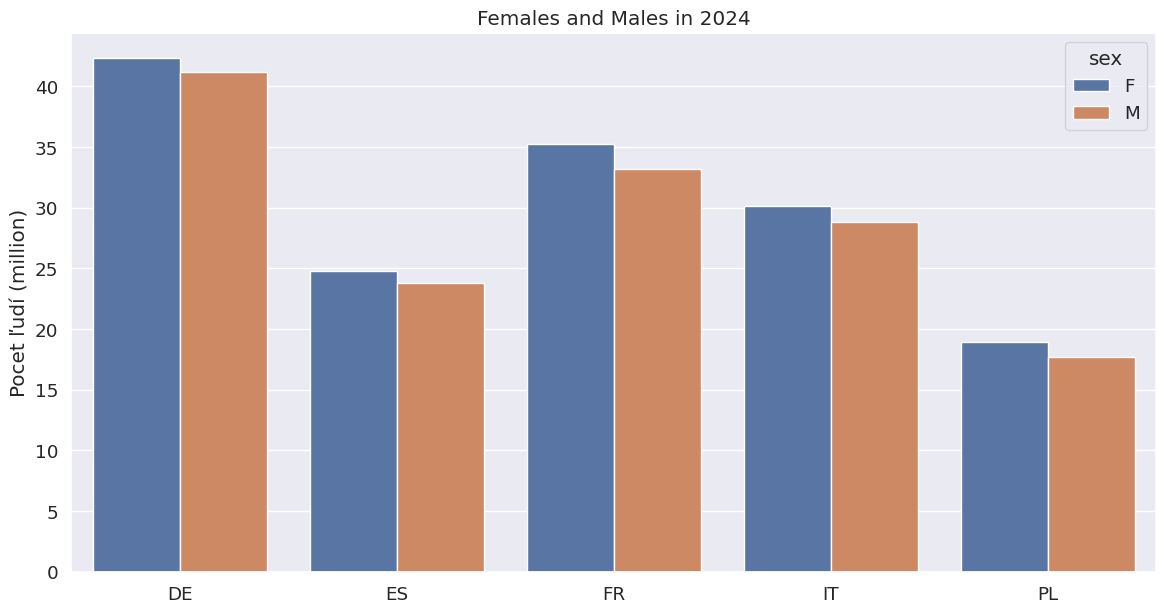

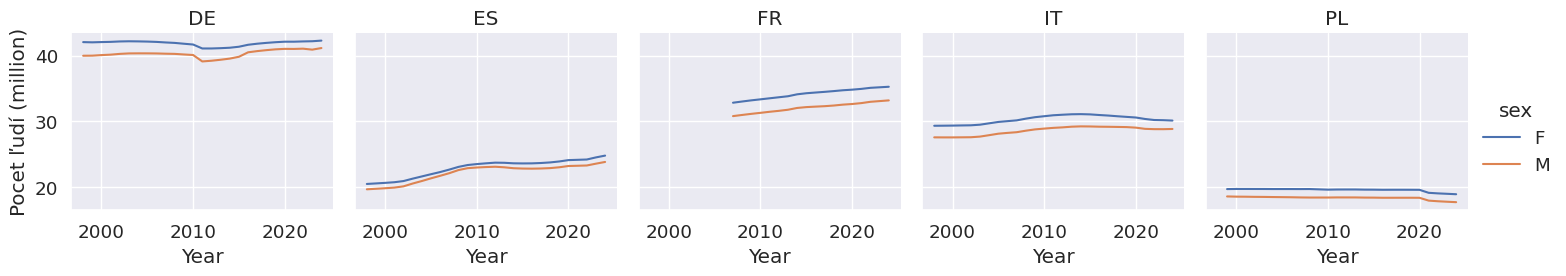

In [47]:
df['OBS_VALUE_milion'] = df['OBS_VALUE'] /1000000
osnova = df[df['geo'].isin(countries_highest_number_immigrates)]

df_males = df[df['sex']=='M']
df_females = df[df['sex']=='F']
df_females = df_females.query('TIME_PERIOD==2024')
df_males = df_males.query('TIME_PERIOD==2024')
df_females['OBS_VALUE_milion'] = df_females['OBS_VALUE'] /1000000
df_males['OBS_VALUE_milion'] = df_males['OBS_VALUE'] /1000000
df_females = df_females.sort_values(by='OBS_VALUE_milion')
df_males = df_males.sort_values(by='OBS_VALUE_milion')
df_females = df_females[df_females['geo'].isin(countries_highest_number_immigrates)]
df_males = df_males[df_males['geo'].isin(countries_highest_number_immigrates)]
df_spolu = pd.merge(df_females,df_males, on='geo')
fig, axes = plt.subplots(1, 1, figsize=(14, 7))
def rotate_bar_labels(axes, angle=45):
    axes.tick_params(axis='x', labelrotation=angle, pad=-5)
    plt.setp(axes.get_xticklabels(), ha='right')

sns.barplot(data=osnova[osnova['TIME_PERIOD']==2024], x='geo', y='OBS_VALUE_milion',hue='sex', ax=axes)
axes.set_ylabel('Pocet ľudí (million)')
axes.set_xlabel(None)
axes.set_title('Females and Males in 2024')






sns.set_theme(font_scale=1.2)
grid = sns.relplot(data=df[df['geo'].isin(countries_highest_number_immigrates)],
x='TIME_PERIOD', y='OBS_VALUE_milion', col='geo',
col_wrap=5, kind="line", height=3, aspect=1,hue='sex')
grid.set_axis_labels('Year', 'Pocet ľudí (million)')
grid.set_titles("{col_name}") # title of each plot will be country name




plt.show()
pass

<ipython-input-23-1a8d3226845b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



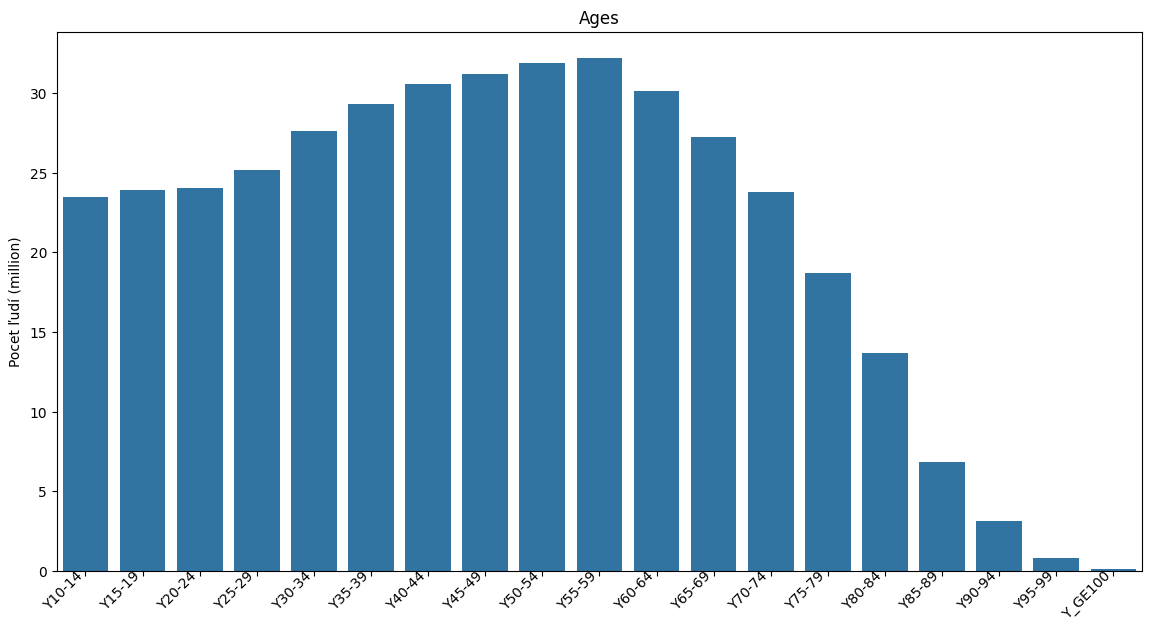

In [23]:
url2 = "https://raw.githubusercontent.com/loveBeatles/datavis_project/main/data/age_data.csv"
data_frame_by_ages = pd.read_csv(url2).drop(['STRUCTURE','STRUCTURE_ID', 'freq','unit','OBS_FLAG','CONF_STATUS'], axis=1)
data_frame_by_ages_without_gender = data_frame_by_ages.query('TIME_PERIOD==2024')
data_frame_by_ages_without_gender = data_frame_by_ages_without_gender.query('sex=="T"')
data_frame_by_ages_without_gender['OBS_VALUE_milion'] = data_frame_by_ages_without_gender['OBS_VALUE'] /1000000
data_frame_by_ages_without_gender = data_frame_by_ages_without_gender.groupby('age')['OBS_VALUE_milion'].sum().reset_index()
data_frame_by_ages_without_gender  = data_frame_by_ages_without_gender.query('age!="Y15-64"')
data_frame_by_ages_without_gender  = data_frame_by_ages_without_gender.iloc[:-4,:]
index = data_frame_by_ages_without_gender[data_frame_by_ages_without_gender['age'] == 'Y5-9'].index
row = data_frame_by_ages_without_gender.loc[index,:]
data_frame_by_ages_without_gender = data_frame_by_ages_without_gender.drop(index)

data_frame_by_ages_without_gender = data_frame_by_ages_without_gender.sort_values(by='age')

fig, axes = plt.subplots(1, 1, figsize=(14, 7))
def rotate_bar_labels(axes, angle=45):
    axes.tick_params(axis='x', labelrotation=angle, pad=-5)
    plt.setp(axes.get_xticklabels(), ha='right')

sns.barplot(data=data_frame_by_ages_without_gender, x='age', y='OBS_VALUE_milion', color="C0", ax=axes)
axes.set_ylabel('Pocet ľudí (million)')
axes.set_xlabel(None)
axes.set_title('Ages')
rotate_bar_labels(axes)
pass